In [ ]:
pip install tabula-py

In [ ]:
import tabula
tabula.read_pdf('/Users/YC/Desktop/Scholarship Application/ePayslip20201019.pdf', stream=True)

In [ ]:
pip install --upgrade pip

In [ ]:
#Working with PDF in Python --> https://realpython.com/pdf-python/
!pip install PyPDF2

In [ ]:
import PyPDF2 as p2
PDFfile = open("/Users/YC/Desktop/data.pdf", "rb")  #the rb is to allow editing mode
PDFread = p2.PdfFileReader(PDFfile)
x=PDFread.getPage(1)

In [ ]:
data = x.extractText()
data

In [ ]:
df= data.DataFrame(data, (7,5)) 
#because the data we have are strings, cannot be reshaped into dataframe

## Read Payslip into csv 28th Dec 2020

In [ ]:
#install modules
pip install pdfplumber

#### Task1: Use Regular expression to read a pdf file and write into pandas data frame and csv

In [1]:
#Import Library
import re       #regular expression
import pdfplumber 
import pandas as pd
from collections import namedtuple #namedtuple library from collections module
import unicodedata  #for decode the text from unicode to actual character
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Give a variable named line
Line = namedtuple("Line","Company_Name")

In [ ]:
#Define what is an employee line with regular expression and test to see if match
company_re = re.compile(r"((.*)Ltd)")
company_re.match("Perspetum Diagnostics Ltd")

In [ ]:
#test and see if group match the regular expression. 
company_re.search("Perspetum Diagnostics Ltd").group(1)

In [ ]:
type(company_re.search("Perspetum Diagnostics Ltd"))

In [ ]:
file = '/Users/YC/Work_Repo/fYnanCe/ePayslip20201019.pdf'

In [ ]:
#Practice using pdfplumber
with pdfplumber.open(file) as pdf:
    page = pdf.pages[0]
    print(page.chars[0])
    meta = pdf.metadata
    print(meta)
    table = page.extract_table()
    print(table)
    texts = page.extract_text()
    print(texts)

In [ ]:
texts

In [ ]:
print(texts) # The difference between texts and print(texts) is that print will render out the white space and new line

In [ ]:
#Try to split with a new line but return in unit-8 format. Here is explanation https://stackoverflow.com/questions/39807985/python-write-file-dealing-with-encode

line = texts.strip("\n") # however .strip() will not help
line
print(line)

In [ ]:
# use regular expression to search through text rather than line. 
comp = company_re.search(texts)
Company_Name = comp.group(1)
print(Company_Name) 

In [ ]:
# use append function
holder = [] #create a list holder
comp = company_re.search(texts)
Company_Name = comp.group(1)
holder.append(Line(Company_Name))
print(holder)

In [ ]:
#practice wirting the holder into a pandas dataframe
df = pd.DataFrame(holder)
df.head()

In [ ]:
#try writing the dataframe into a csv file
df.to_csv("payslip.csv", index = False)

#### Task2: String Cleaning

In [ ]:
print(texts)

In [ ]:
type(texts)

In [ ]:
#change the unicode string to the normal form NFKC. see-> https://docs.python.org/2/library/unicodedata.html#unicodedata.normalize
text2 = unicodedata.normalize("NFC",texts)   #NFC doesn't normalise the white space
text2 = unicodedata.normalize("NFKC",texts)  #NFKC do normalise the white space
text2 = unicodedata.normalize("NFD",texts)   #NFD doesn't normalise the white space
text2 = unicodedata.normalize("NFKD",texts)  #NFKD do normalise the white space
text2

#however, none of it normalise \xad

In [ ]:
#replace the \xad, which is the U+00AD soft-hyphen characters. see-> https://stackoverflow.com/questions/51976328/best-way-to-remove-xad-in-python
text3 = text2.replace("\xad", "")
text3

In [ ]:
#try to split lines in texts
text4 = text3.split("\n")
text4

In [ ]:
type(text4)

In [ ]:
text5 = text3.split()
text5

#### Task 3: expand to use regular expression to match Employee_ID, Employee_Name, Company_Name

In [ ]:
#Define what is an employee line with regular expression
#the "-" in SO-249 will cause the regular expression to crash
# \S will match any non-whitespace character
employ_re = re.compile(r"(SO\S\d+)(.*)(Perspectum.*)")
employ_re.search(text3).group(1,2,3)

In [ ]:
#try to match text variable and return it as a list
employ_re.findall(text3)

In [ ]:
Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name")


holder = [] #create a list holder
emp = employ_re.search(text3)
Employee_ID, Employee_Name, Company_Name = emp.group(1), emp.group(2), emp.group(3)
holder.append(Line(Employee_ID, Employee_Name, Company_Name))
df = pd.DataFrame(holder)
df

#### Task4: Practice Regular Expression with the existing : 

In [ ]:
PayDate_re = re.compile(r"(Date: )(\d{2}/\d{2}/\d{4})")
PayDate_re.search(text3).group(2)

In [ ]:
#Expand the match and try to ignore matching white space
Salary_re = re.compile(r"(Salary)(\s\d+.\d+)")
Salary_re.search(text3)
BackPay_re = re.compile(r"(Back Pay)(\s\d+.\d+)")
BackPay_re.search(text3)
Tax_re = re.compile(r"(Tax)(\s\d+.\d+)")
NI_re = re.compile(r"(National Insurance)(\s\d+.\d+)")
NI_re.search(text3)

In [ ]:
#Expand to include the national insurance contribution
ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+.\d+)")    #Employer's National Insurance Contribution to Date. #Somehow white space does not work
ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s\d+.\d+)")   #Employer National Insurance Contribution Year to Date
ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s\d+.\d+)") #Employer's Pension contribution. It does not form part of your salary which is going through your payslip with a gross to net analysis each month
ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s\d+.\d+)")

In [ ]:
ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+)")
ErsNICTP_re.search(text3).group(2)

In [ ]:
ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s\d+.\d)")
ErsNICYTD_re.search(text3).group(2)

In [ ]:
ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s\d+.\d)")
ErsPensionTP_re.search(text3).group(2)

In [ ]:
ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s\d+.\d)")
ErsPensionYTD_re.search(text3).group(2)

In [ ]:
#Bundle the regular expressions together. Yaya succeeded

Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Back_Pay, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD")


holder = [] 

#employment information
emp = employ_re.search(text3) 
Employee_ID, Employee_Name, Company_Name = emp.group(1), emp.group(2), emp.group(3)


#Cashflow information
Pay_Date = PayDate_re.search(text3).group(2)
Salary = Salary_re.search(text3).group(2)
Back_Pay = BackPay_re.search(text3).group(2)
Tax = Tax_re.search(text3).group(2)
National_Insurance = NI_re.search(text3).group(2)


#Benefit information
Ers_NIC_TP = ErsNICTP_re.search(text3).group(2)
Ers_NIC_YTD = ErsNICYTD_re.search(text3).group(2)
Ers_Pension_TP = ErsPensionTP_re.search(text3).group(2)
Ers_Pension_YTD = ErsPensionYTD_re.search(text3).group(2)


#Use named tuple to bumdle all the information
holder.append(Line(Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Back_Pay, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD))

df = pd.DataFrame(holder)
df

#### Task5: Format the text to numerical value and date time format

In [ ]:
df.info()

In [ ]:
#convert Pay Date values to date time format
df["Pay_Date"] = pd.to_datetime(df["Pay_Date"])

In [ ]:
#convert cashflow and benefit information to numerical values
for col in df.columns[-8:]:
    df[col] = pd.to_numeric(df[col])

#### Task6: Bundle all the regular expression together and write into panadas dataframe

In [ ]:
import re
import pdfplumber 
import pandas as pd
from collections import namedtuple
import unicodedata

file = '/Users/YC/Work_Repo/fYnanCe/ePayslip20201019.pdf'


with pdfplumber.open(file) as pdf:
    page = pdf.pages[0]
    texts = page.extract_text()
    
text2 = unicodedata.normalize("NFKD",texts)
text3 = text2.replace("\xad", "")

employ_re = re.compile(r"(SO\S\d+)(.*)(Perspectum.*)")
PayDate_re = re.compile(r"(Date: )(\d{2}/\d{2}/\d{4})")
Salary_re = re.compile(r"(Salary)(\s\d+.\d+)")
BackPay_re = re.compile(r"(Back Pay)(\s\d+.\d+)")
Tax_re = re.compile(r"(Tax)(\s\d+.\d+)")
NI_re = re.compile(r"(National Insurance)(\s\d+.\d+)")
ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+.\d+)")    
ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s\d+.\d+)")
ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s\d+.\d+)")
ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s\d+.\d+)")


Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Back_Pay, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD")
emp = employ_re.search(text3) 
Employee_ID = employ_re.search(text3).group(1)
Employee_Name = employ_re.search(text3).group(2)
Company_Name = employ_re.search(text3).group(3)
Pay_Date = PayDate_re.search(text3).group(2)
Salary = Salary_re.search(text3).group(2)
Back_Pay = BackPay_re.search(text3).group(2)
Tax = Tax_re.search(text3).group(2)
National_Insurance = NI_re.search(text3).group(2)

Ers_NIC_TP = ErsNICTP_re.search(text3).group(2)
Ers_NIC_YTD = ErsNICYTD_re.search(text3).group(2)
Ers_Pension_TP = ErsPensionTP_re.search(text3).group(2)
Ers_Pension_YTD = ErsPensionYTD_re.search(text3).group(2)

holder = []
holder.append(Line(Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Back_Pay, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD))

df = pd.DataFrame(holder)
df["Pay_Date"] = pd.to_datetime(df["Pay_Date"])
for col in df.columns[-8:]:
    df[col] = pd.to_numeric(df[col])
df

#### Task7:Build the combined code in to for loop to extract multiple pages of payslip

In [ ]:
#Import library pdfplumber and Explore pdfplumer: resource can be found: https://pypi.org/project/pdfplumber/#objects

import pdfplumber

file = "/Users/YC/Work_Repo/fYnanCe/3page.pdf"

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    metaPage = pdf.metadata
    print(extractPage)
    print(metaPage)
    
    PN = extractPage[1].page_number
    PW = extractPage[1].width
    PH = extractPage[1].height
    PO = extractPage[1].objects
    PC = extractPage[1].chars
    PT = extractPage[1].extract_text()
    print(PN,PW,PH)
    print(PT)

type(pdf)         #See what the type of them are >> pdfplumber.pdf.PDF
type(extractPage) #>>list

In [ ]:
#Build for loop to extract text from each page

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        print("Here is the text in page:", i+1)
        print(PT)
        print(" ")
        
print("done")

#### Task8: Loop through each page of pdf with text manipulation

In [ ]:
import unicodedata

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        PT2 = unicodedata.normalize("NFKD",PT)
        PT3 = PT2.replace("\xad", "")
        print("Here is the text in page:", i+1)
        print(PT3)
        print(" ")
        
print("done")

In [ ]:
# With .strip() method, no need to use unicodedata to conduct text manipulation. Actually still need to normalise it 

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        PT2 = PT.strip( )
        print("Here is the text in page:", i+1)
        print(PT2)
        print(" ")
        
print("done")

In [ ]:
import re
import pdfplumber 
import pandas as pd
from collections import namedtuple

file = "/Users/YC/Work_Repo/fYnanCe/3page.pdf"

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    
    holder = []
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        PT2 = unicodedata.normalize("NFKD",PT)
        PT3 = PT2.replace("\xad", "")

        employ_re = re.compile(r"(SO\S\d+)(.*)(Perspectum.*)")
        PayDate_re = re.compile(r"(Date: )(\d{2}/\d{2}/\d{4})")
        Salary_re = re.compile(r"(Salary)(\s\d+.\d+)")
        BackPay_re = re.compile(r"(Back Pay)(\s\d+.\d+)")
        Tax_re = re.compile(r"(Tax)(\s\d+.\d+)")
        NI_re = re.compile(r"(National Insurance)(\s\d+.\d+)")
        ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+.\d+)")    
        ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s\d+.\d+)")
        ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s\d+.\d+)")
        ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s\d+.\d+)")


        Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD")
        emp = employ_re.search(PT3) 
        Employee_ID = employ_re.search(PT3).group(1)
        Employee_Name = employ_re.search(PT3).group(2)
        Company_Name = employ_re.search(PT3).group(3)
        Pay_Date = PayDate_re.search(PT3).group(2)
        Salary = Salary_re.search(PT3).group(2)
        # Back_Pay = BackPay_re.search(PT3).group(1)     #need to find how to accommodate for no value
        Tax = Tax_re.search(PT3).group(2)
        National_Insurance = NI_re.search(PT3).group(2)

        Ers_NIC_TP = ErsNICTP_re.search(PT3).group(2)
        Ers_NIC_YTD = ErsNICYTD_re.search(PT3).group(2)
        Ers_Pension_TP = ErsPensionTP_re.search(PT3).group(2)
        Ers_Pension_YTD = ErsPensionYTD_re.search(PT3).group(2)

        holder.append(Line(Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD))

df = pd.DataFrame(holder)
df["Pay_Date"] = pd.to_datetime(df["Pay_Date"])

for col in df.columns[4:]:  # use the 4 column to last column
     df[col] = pd.to_numeric(df[col])  
df


In [ ]:
df.info()

In [ ]:
file = "/Users/YC/Work_Repo/fYnanCe/5pages.pdf"

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    
    holder = []
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        PT2 = unicodedata.normalize("NFKD",PT)
        PT3 = PT2.replace("\xad", "")

        employ_re = re.compile(r"(SO\S\d+)(.*)(Perspectum.*)")
        PayDate_re = re.compile(r"(Date: )(\d{2}/\d{2}/\d{4})")
        Salary_re = re.compile(r"(Salary)(\s)(\d+.\d+)")
        BackPay_re = re.compile(r"(Back Pay)(\s)(\d+.\d+)")
        Tax_re = re.compile(r"(Tax)(\s)(\d+.\d+)")
        NI_re = re.compile(r"(National Insurance)(\s)(\d+.\d+)")
        ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+.\d+)")    
        ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s)(\d+.\d+)")
        ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s)(\d+.\d+)")
        ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s)(\d+.\d+)")


        Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD")
        emp = employ_re.search(PT3) 
        Employee_ID = employ_re.search(PT3).group(1)
        Employee_Name = employ_re.search(PT3).group(2)
        Company_Name = employ_re.search(PT3).group(3)
        Pay_Date = PayDate_re.search(PT3).group(2)
        Salary = Salary_re.search(PT3).group(3)
        # Back_Pay = BackPay_re.search(PT3).group(1)     #need to find how to accommodate for no value
        Tax = Tax_re.search(PT3).group(3)
        National_Insurance = NI_re.search(PT3).group(3)

        Ers_NIC_TP = ErsNICTP_re.search(PT3).group(2)
        Ers_NIC_YTD = ErsNICYTD_re.search(PT3).group(3)
        Ers_Pension_TP = ErsPensionTP_re.search(PT3).group(3)
        Ers_Pension_YTD = ErsPensionYTD_re.search(PT3).group(3)

        holder.append(Line(Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD))

df = pd.DataFrame(holder)
df["Pay_Date"] = pd.to_datetime(df["Pay_Date"])

for col in df.columns[4:]:  # use the 4 column to last column
     df[col] = pd.to_numeric(df[col], errors="ignore")   #When setting the error to ignore,then invalid parsing will return the input
df

In [ ]:
df.info() 
# The datatype is still object

In [ ]:
float(1,148)
# Tried using float to convert the value, the problem seems to be at the ,

In [ ]:
a = "1,148"
a.replace(",", "")

In [2]:
file = "/Users/YC/Work_Repo/fYnanCe/5pages.pdf"

with pdfplumber.open(file) as pdf:
    extractPage = pdf.pages
    
    holder = []
    for i in range(len(extractPage)):
        PT = extractPage[i].extract_text()
        PT2 = unicodedata.normalize("NFKD",PT)
        PT3 = PT2.replace("\xad", "").replace(",", "") # use replace to get rid of the characters that are Python specified

        employ_re = re.compile(r"(SO\S\d+)(.*)(Perspectum.*)")
        PayDate_re = re.compile(r"(Date: )(\d{2}/\d{2}/\d{4})")
        Salary_re = re.compile(r"(Salary)(\s)(\d+.\d+)")
        BackPay_re = re.compile(r"(Back Pay)(\s)(\d+.\d+)")
        Tax_re = re.compile(r"(Tax)(\s)(\d+.\d+)")
        NI_re = re.compile(r"(National Insurance)(\s)(\d+.\d+)")
        ErsNICTP_re = re.compile(r"(Ers NIC TP:)(\d+.\d+)")    
        ErsNICYTD_re = re.compile(r"(Ers NIC YTD:)(\s)(\d+.\d+)")
        ErsPensionTP_re = re.compile(r"(Ers Pension TP:)(\s)(\d+.\d+)")
        ErsPensionYTD_re = re.compile(r"(Ers Pension YTD:)(\s)(\d+.\d+)")


        Line = namedtuple("Employment","Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD")
        emp = employ_re.search(PT3) 
        Employee_ID = employ_re.search(PT3).group(1)
        Employee_Name = employ_re.search(PT3).group(2)
        Company_Name = employ_re.search(PT3).group(3)
        Pay_Date = PayDate_re.search(PT3).group(2)
        Salary = Salary_re.search(PT3).group(3)
        # Back_Pay = BackPay_re.search(PT3).group(1)     #need to find how to accommodate for no value
        Tax = Tax_re.search(PT3).group(3)
        National_Insurance = NI_re.search(PT3).group(3)

        Ers_NIC_TP = ErsNICTP_re.search(PT3).group(2)
        Ers_NIC_YTD = ErsNICYTD_re.search(PT3).group(3)
        Ers_Pension_TP = ErsPensionTP_re.search(PT3).group(3)
        Ers_Pension_YTD = ErsPensionYTD_re.search(PT3).group(3)

        holder.append(Line(Employee_ID, Employee_Name, Company_Name, Pay_Date, Salary, Tax, National_Insurance, Ers_NIC_TP, Ers_NIC_YTD, Ers_Pension_TP, Ers_Pension_YTD))

df = pd.DataFrame(holder)
df["Pay_Date"] = pd.to_datetime(df["Pay_Date"])

for col in df.columns[4:]:  # use the 4 column to last column
     df[col] = pd.to_numeric(df[col])  
        # Because the comma had been replaced in the numbers, we don't need to set "error" value for pd.to_numeric()
df

,Employee_ID,Employee_Name,Company_Name,Pay_Date,Salary,Tax,National_Insurance,Ers_NIC_TP,Ers_NIC_YTD,Ers_Pension_TP,Ers_Pension_YTD
0,SO249,Yi Chun Wang,Perspectum Ltd,2020-08-31,1334.13,47.6,58.65,75.73,458.24,60.74,242.96
1,SO249,Yi Chun Wang,Perspectum Ltd,2020-09-30,2500.00,271.4,192.96,230.18,688.42,113.80,356.76
2,SO249,Yi Chun Wang,Perspectum Ltd,2020-10-31,2500.00,271.6,192.96,230.18,918.60,113.80,470.56
3,SO249,Yi Chun Wang,Perspectum Ltd,2020-11-30,2500.00,271.6,192.96,230.18,1148.78,113.80,584.36
4,SO249,Yi Chun Wang,Perspectum Ltd,2020-12-31,2500.00,330.2,228.25,270.77,1419.55,113.80,698.16
5,SO249,Yi Chun Wang,Perspectum Ltd,2021-01-31,2500.00,271.6,192.96,230.18,1649.73,113.80,811.96
6,SO249,Yi Chun Wang,Perspectum Ltd,2021-02-28,2850.00,338.6,233.28,276.55,1926.28,129.73,941.69
7,SO249,Yi Chun Wang,Perspectum Ltd,2021-03-31,2850.00,338.8,233.28,276.55,2202.83,129.73,1071.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         8 non-null      object        
 1   Employee_Name       8 non-null      object        
 2   Company_Name        8 non-null      object        
 3   Pay_Date            8 non-null      datetime64[ns]
 4   Salary              8 non-null      float64       
 5   Tax                 8 non-null      float64       
 6   National_Insurance  8 non-null      float64       
 7   Ers_NIC_TP          8 non-null      float64       
 8   Ers_NIC_YTD         8 non-null      float64       
 9   Ers_Pension_TP      8 non-null      float64       
 10  Ers_Pension_YTD     8 non-null      float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 832.0+ bytes


In [ ]:
# What is the trend of the salary?
fig, ax = plt.subplots(1, figsize = (10,4))
ax.set_title("Salary vs Time")
ax.set_ylabel("GBP")
plt.scatter(df["Pay_Date"], df["Salary"])
plt.plot(df["Pay_Date"], df["Salary"])

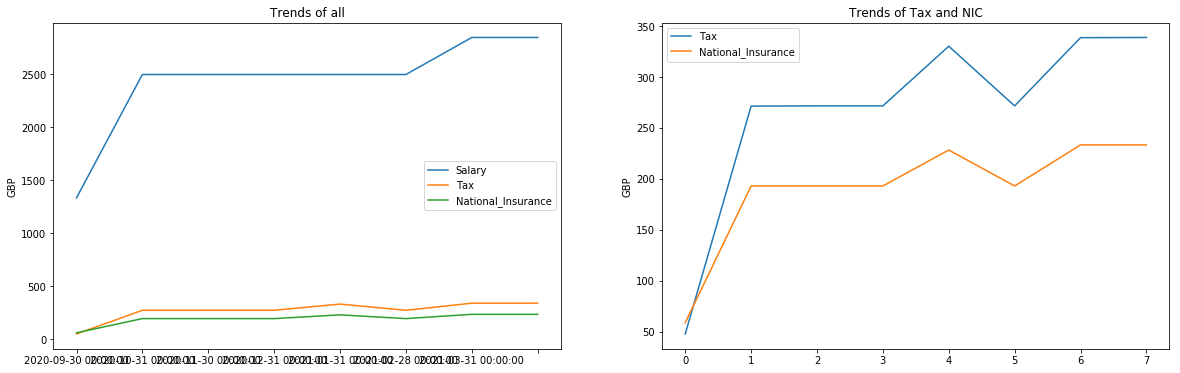

In [4]:
# What is the trend of Salary and Tax and National Insurance Contribution?

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
axes[0].set_ylabel("GBP")
axes[1].set_ylabel("GBP")
axes[0].set_xticklabels(df.Pay_Date)  #set the xtick label to use the column Pay_Date, but the timestamp is annoying

df[ ["Salary", "Tax", "National_Insurance" ] ].plot.line(ax = axes[0], title = "Trends of all")
df[ ["Tax", "National_Insurance" ] ].plot(kind = "line", ax = axes[1], title = "Trends of Tax and NIC")

In [10]:
# Date Time manipulation. Resource: https://www.dataquest.io/blog/python-datetime-tutorial/
df.Pay_Date[0].strftime("%Y/%m")

'2020/08'

In [11]:
# Create a new list called YearMonth and assign it into the DataFrame
YearMonth = []
for i in range(len(df["Pay_Date"])):
    a = df.Pay_Date[i].strftime("%Y/%m")
    YearMonth.append(a)
df["YearMonth"] = YearMonth
print(type(df["YearMonth"])) # type is <class 'pandas.core.series.Series'>
print(len(df["YearMonth"]))  # Make sure that the for loop run properly 

<class 'pandas.core.series.Series'>
8


In [19]:
df.info() # Now there is a YearMonth column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         8 non-null      object        
 1   Employee_Name       8 non-null      object        
 2   Company_Name        8 non-null      object        
 3   Pay_Date            8 non-null      datetime64[ns]
 4   Salary              8 non-null      float64       
 5   Tax                 8 non-null      float64       
 6   National_Insurance  8 non-null      float64       
 7   Ers_NIC_TP          8 non-null      float64       
 8   Ers_NIC_YTD         8 non-null      float64       
 9   Ers_Pension_TP      8 non-null      float64       
 10  Ers_Pension_YTD     8 non-null      float64       
 11  YearMonth           8 non-null      object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 896.0+ bytes


[Text(0, 0, '2020/08'),
 Text(0, 0, '2020/09'),
 Text(0, 0, '2020/10'),
 Text(0, 0, '2020/11'),
 Text(0, 0, '2020/12'),
 Text(0, 0, '2021/01'),
 Text(0, 0, '2021/02'),
 Text(0, 0, '2021/03')]

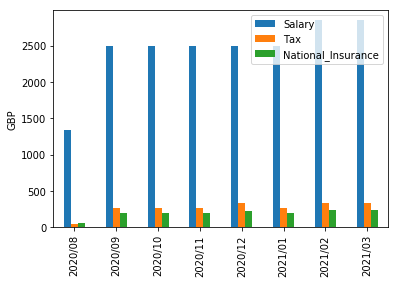

In [18]:
# Shows the percentage of tax and NIC toward a given Salary
ax = df[ ["Salary","Tax" , "National_Insurance" ] ].plot(kind = 'bar')
ax.set_ylabel("GBP")
ax.set_xticklabels(df.YearMonth)

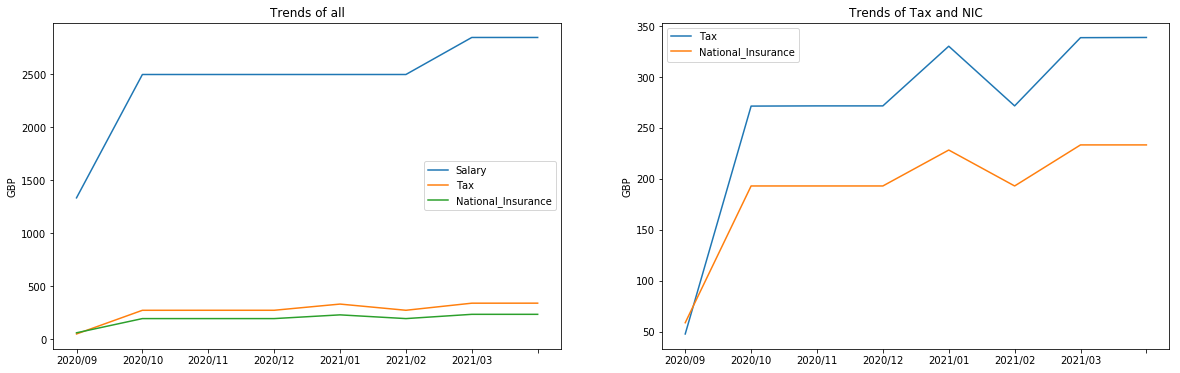

In [12]:
# Successfully set the x tick labels
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
axes[0].set_ylabel("GBP")
axes[1].set_ylabel("GBP")
axes[0].set_xticklabels(df.YearMonth)  # Use the new colume YearMonth to be the xticks label
axes[1].set_xticklabels(df.YearMonth)

df[ ["Salary", "Tax", "National_Insurance" ] ].plot.line(ax = axes[0], title = "Trends of all")
df[ ["Tax", "National_Insurance" ] ].plot(kind = "line", ax = axes[1], title = "Trends of Tax and NIC")

In [ ]:
df[ ["Tax", "National_Insurance"] ].plot.pie(y = df["Salary"])

In [ ]:
plt.pie(df.Salary[0], df.Tax[0])
# Pie chart won't make much sense